In [2]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import h5py
import os
import seaborn as sns
import shutil



In [3]:
def plot_delta_ovlp(filename="abvmc.hdf5", discard = 2, annot=True):
    copyfile = "copy_" + filename
    shutil.copyfile(filename, copyfile)
    f = h5py.File(copyfile, "r")    
    keys = f.keys()
    
    fig, ax = plt.subplots(3, 2, figsize = (12, 15))    
    ovlp_ij_raw=np.array(f['excitationsovlp_ij'])
    delta_ij_raw=np.array(f['excitationsdelta'])
    discard = 2
    ovlp_ij = np.average(ovlp_ij_raw[discard:], axis=0)
    # plt.figure()
    sns.heatmap(ovlp_ij, ax=ax[0, 0], annot=annot)
    ax[0, 0].set_title('Overlap matrix')
    # plt.title('Overlap matrix')

    ovlp_ij_std = np.std(ovlp_ij_raw[discard:], axis=0)
    sns.heatmap(ovlp_ij_std, ax=ax[1, 0], annot=annot)
    ax[1, 0].set_title('Standard deviation of overlap matrix')
    
    filtered_ovlp_ij = copy.deepcopy(ovlp_ij)
    filtered_ovlp_ij[ovlp_ij_std>np.abs(ovlp_ij)] = 0
    sns.heatmap(filtered_ovlp_ij, ax=ax[2, 0], annot=annot)
    ax[2, 0].set_title('Filtered overlap matrix')
    


    delta_ij = np.average(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij, ax=ax[0, 1], annot=annot)
    ax[0, 1].set_title('Delta matrix')
                       
    delta_ij_std = np.std(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij_std, ax=ax[1, 1], annot=annot)
    ax[1, 1].set_title('Standard deviation of delta matrix')
    

    filtered_delta_ij = copy.deepcopy(delta_ij)
    filtered_delta_ij[delta_ij_std>np.abs(delta_ij)] = 0
    sns.heatmap(filtered_delta_ij, ax=ax[2, 1], annot=annot)
    ax[2, 1].set_title('Filtered Delta matrix')

    os.remove(copyfile)
    return {'filtered': [filtered_ovlp_ij, filtered_delta_ij], 
            'raw': [ovlp_ij_raw, delta_ij_raw]}
# res = plot_delta_ovlp()

In [7]:
import pyqmc.api as pyq
abvmcopt_file = "c_vmc_cas_4_nelecas_4_2.hdf5-ion_cusp_only.hdf5"
df = pyq.read_opt(abvmcopt_file)
df


,energy,iteration,error,fname
0,-2.632700,0,0.004607,he_opt_cas_3_nelecas_1_1.hdf5
1,-2.698045,1,0.002914,he_opt_cas_3_nelecas_1_1.hdf5
2,-2.739907,2,0.003305,he_opt_cas_3_nelecas_1_1.hdf5
3,-2.766646,3,0.002808,he_opt_cas_3_nelecas_1_1.hdf5
4,-2.769331,4,0.003183,he_opt_cas_3_nelecas_1_1.hdf5
5,-2.768257,5,0.003615,he_opt_cas_3_nelecas_1_1.hdf5
6,-2.770257,6,0.001888,he_opt_cas_3_nelecas_1_1.hdf5
7,-2.777350,7,0.002950,he_opt_cas_3_nelecas_1_1.hdf5
8,-2.779255,8,0.004278,he_opt_cas_3_nelecas_1_1.hdf5
9,-2.770964,9,0.004387,he_opt_cas_3_nelecas_1_1.hdf5


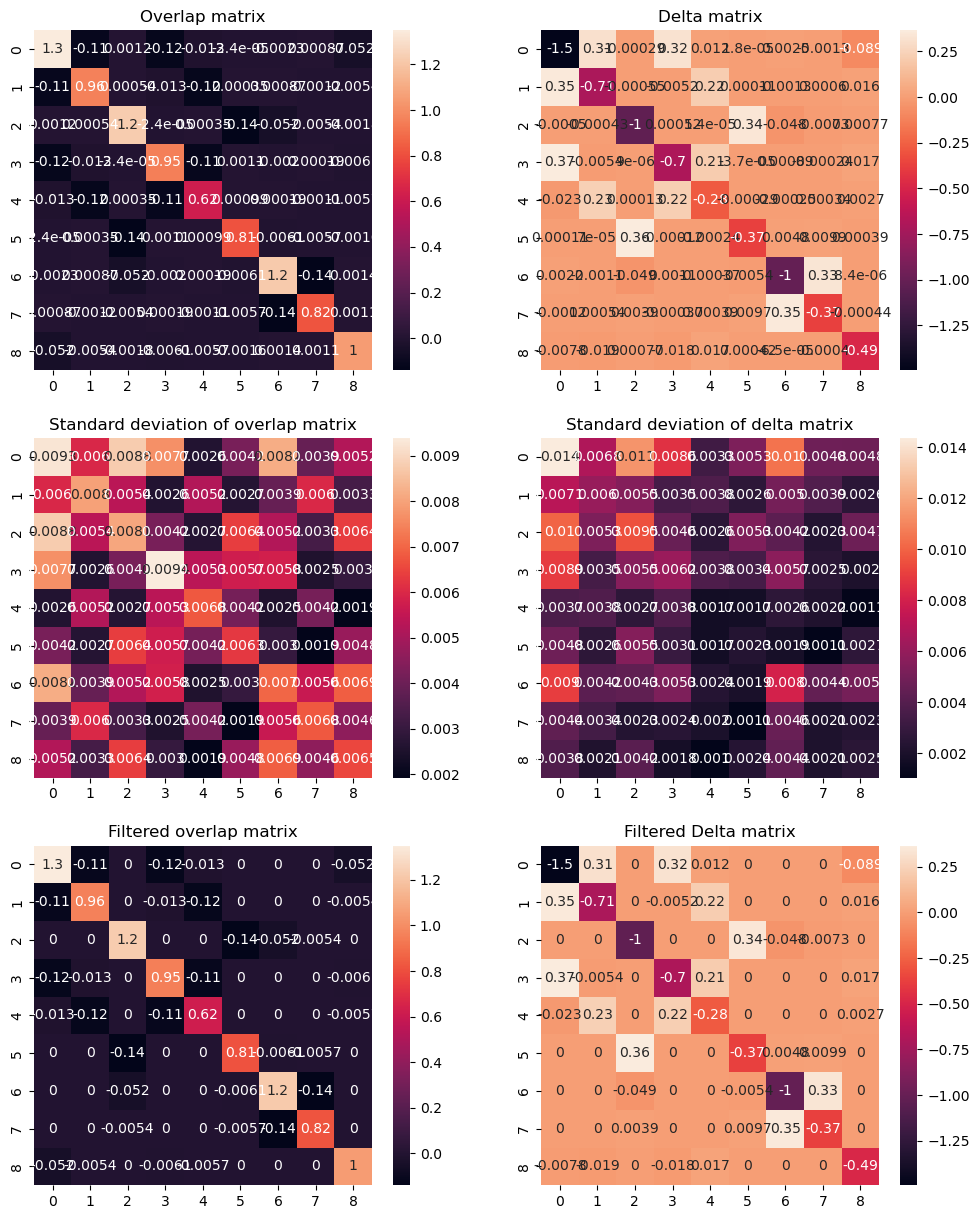

In [13]:
res = plot_delta_ovlp("c_vmc_cas_4_nelecas_4_2.hdf5-ion_cusp_only.hdf5", discard=10, annot=True)

In [1]:
import pyqmc.api as pyq
abvmcopt_file = "c_vmc_cas_4_nelecas_4_2.hdf5"
df = pyq.read_opt(abvmcopt_file)
df


KeyError: "Unable to open object (object 'energy' doesn't exist)"

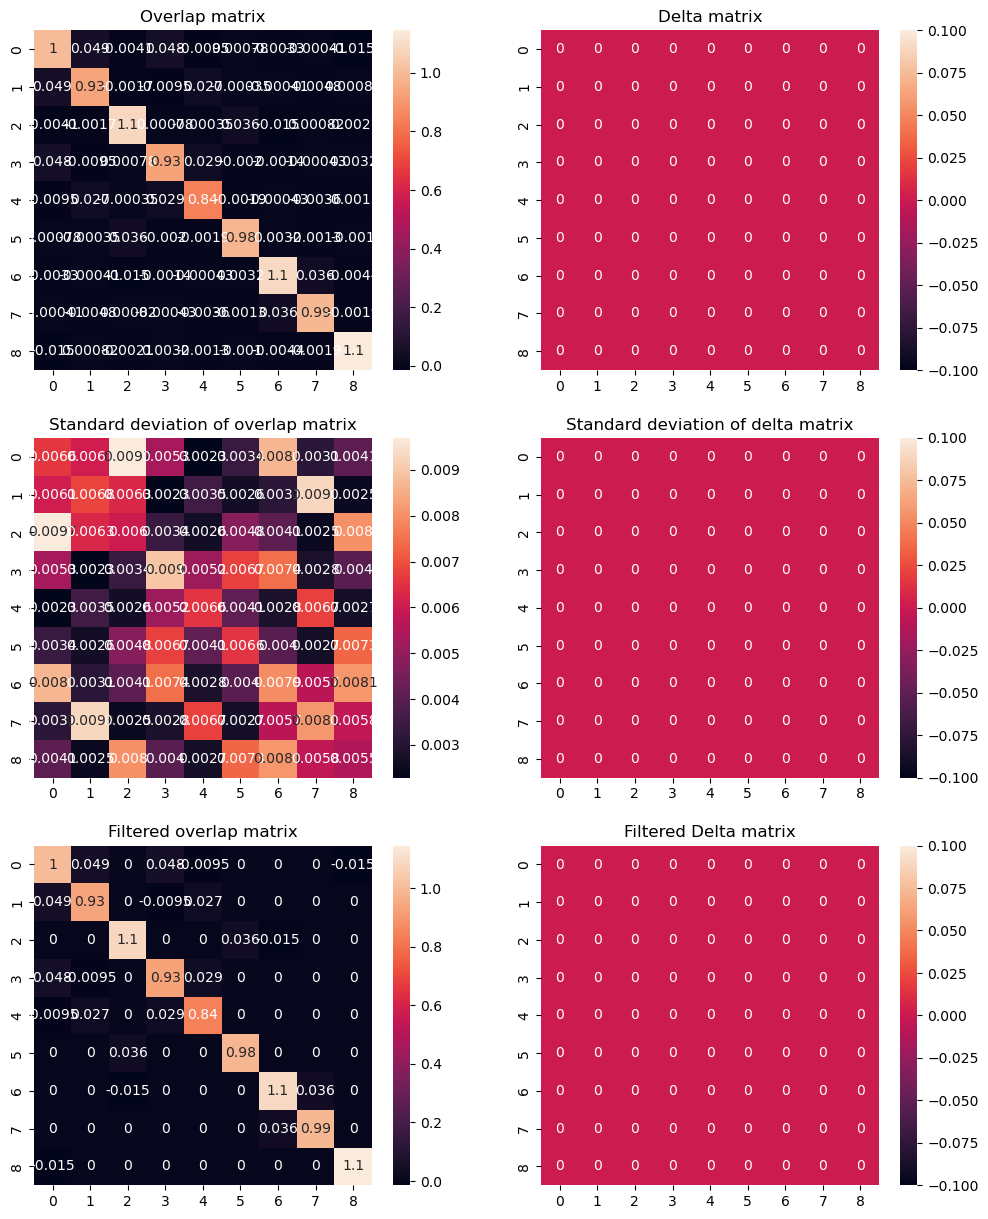

In [15]:
res = plot_delta_ovlp("c_vmc_cas_4_nelecas_4_2.hdf5", discard=10, annot=True)